In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math

In [3]:
import torch.nn as nn
import torch

In [4]:
from utils import MnistData
from models import ModelManager, ModelType

In [5]:
model_loaded = ModelManager.get_trained(ModelType.MnistCnnPatt)

In [6]:
data = MnistData(True)

In [7]:
max_norm = 50 / 255  # kappa - the radius of L_\infinity ball around benign example
step_size = 1e-2  # alpha - the size of the step

In [8]:
images, labels = data.get_training_batch(100)
benign_images = images
for step in range(math.floor(min(max_norm * 4 * 255, max_norm * 255 * 1.25))):
    images.requires_grad = True
    if step % 10 == 0:
        print(f'--- {step} ---')
    if images.grad is not None:
        images.grad.zero_()
    loss = nn.CrossEntropyLoss()(model_loaded(images), labels)
    loss.backward()
    images = MnistData.clip(benign_images, images + step_size * images.grad.apply_(lambda x: 1 if x >= 0 else -1), max_norm)
altered_training_images = images

--- 0 ---
--- 10 ---
--- 20 ---
--- 30 ---
--- 40 ---
--- 50 ---
--- 60 ---


In [9]:
possible_adversarials = MnistData.get_adversarials(model_loaded, benign_images, labels, altered_training_images)
len(possible_adversarials)

69

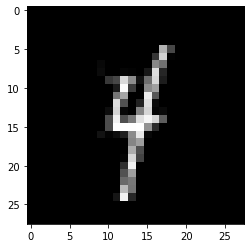

+++++


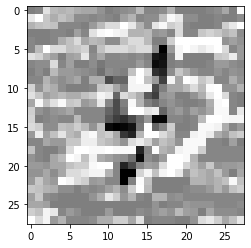

=====


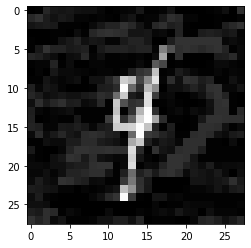

Label: 4, Prediction: 9, Confidence: 1.0
Original prediction: 4, Original confidence: 1.0


In [10]:
MnistData.show_adversarial(possible_adversarials, benign_images, altered_training_images, 0)

In [11]:
import numpy as np
from matplotlib import pyplot as plt

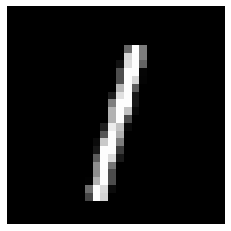

In [15]:
counter = 0
for adversarial in possible_adversarials:
    index = adversarial['Index']
    aexample = altered_training_images[index]
    aexample = aexample.detach()
    aexample = np.array(aexample * 255)
    plt.imshow(aexample.reshape(28, 28), cmap='gray')
    plt.axis("off")
    plt.savefig(f"AEXAMPLES\\I-FGSM\\ALTERED\\ifgsm_altered_{counter}.png", bbox_inches="tight", pad_inches=0)
    bexample = benign_images[index]
    bexample = bexample.detach()
    bexample = np.array(bexample * 255)
    plt.imshow(bexample.reshape(28, 28), cmap='gray')
    plt.axis("off")
    plt.savefig(f"AEXAMPLES\\I-FGSM\\BENIGN\\ifgsm_benign_{counter}.png", bbox_inches="tight", pad_inches=0)
    counter += 1